Đường dẫn đến dataset trên kaggle: https://www.kaggle.com/START-UMD/gtd

#  Thư viện

In [1]:

import pandas as pd
import numpy as np

# Thư viện dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Thư viện dùng để hiển thị bản đồ thế giới 
#pip install folium
#pip install https://github.com/matplotlib/basemap/archive/master.zip
# import folium
# import folium.plugins
# from mpl_toolkits.basemap import Basemap

# import io
# import base64
# from IPython.display import HTML, display
# from matplotlib import animation,rc

%matplotlib inline
sns.set(rc={"figure.figsize": (16, 8)})

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu, sử dụng data frame của pandas
original_df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')
#copy dữ liệu ra ngoài
df = original_df.copy()
# Xem thử 1 số dòng đầu của dữ liệu
df.head()

c:\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# xem thử 1 số dòng cuối của dữ liệu
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
# Lấy số lượng cột của dữ liệu
len(df.columns)

135

In [5]:
# Lấy số lượng dòng của dữ liệu
num_rows = len(df)
num_rows

181691

In [6]:
#Xác định số lượng dữ liệu bị thiếu ở mỗi cột
df.isnull().sum() 

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

Quan sát qua số lượng cột dữ liệu ta thấy quá lớn và có quá nhiều thuộc tính chứa giá trị null hoặc nan

# Tiền xử lý dữ liệu

Loại bỏ các cột có giá trị **nan**

In [7]:
# bỏ đi các cột có số lượng giá trị nan lên tới 80% dữ liệu
cutoff = 0.8
df = df.dropna(thresh=int(cutoff*num_rows), axis=1)
# hiển thị số cột còn lại
len(df.columns)

47

In [8]:
# thống kê số lượng giá trị nan cho các cột còn lại
df.isnull().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
specificity             6
vicinity                0
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
target1               636
natlty1              1559
natlty1_txt          1559
gname                   0
guncertain1           380
individual              0
weaptype1               0
weaptype1_txt           0
weapsubtype1        20768
weapsubtype1_txt    20768
nkill       

Quan sát qua 1 lần nữa các cột sau khi đã lược bỏ, đánh giá từng cột như sau:
- Các cột không có thông tin để phân tích do không được mô tả cần loại bỏ gồm có:
  + INT_*
  + dbsource
  + crit* 
  + specificity 
  + vicinity 
  + doubtterr 
  + multiple
  + natlty1
  + guncertain1
  + individual
  + property
  + ishostkid
  + dbsource
  + success
  + eventid 
- Các cột cần bỏ do thông tin không cần thiết hoặc bị trùng lặp:
  + region (bỏ vì **region** chỉ chứa code định danh, còn **region_txt** mới là tên cần lấy)
  + country (đã có **country_txt** mô tả)
  + provstate (quận huyện không cần thiết, đã có tên thành phố trong thuộc tính **city**)
  + attacktype1 (đã có **attacktype1_txt** mô tả)
  + targtype1, targtype1_txt (đã có **target1** mô tả)
  + targsubtype1, targsubtype1_txt (đã có **target1** mô tả)
  + natlty1_txt (quốc gia được nhắm tới khớp với quốc gia xảy ra bạo loạn)
  + weaptype1 (đã có  **weaptype1_txt** mô tả)
  + weapsubtype1 (dư)
  + weapsubtype1_txt (dư)


 **Sau đó thay thế các tên thành chữ cho dễ đọc**

In [9]:
# Loại bỏ các cột đã định
no_information_columns = ['eventid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'dbsource', 'crit1', 'crit2', 'crit3', 'specificity', 'vicinity', 'doubtterr',
                          'multiple', 'natlty1', 'guncertain1', 'individual', 'property', 'ishostkid', 'dbsource', 'success']
duplicate_information_columns = ['region', 'country', 'provstate', 
                                 'attacktype1', 'targtype1', 'targtype1_txt','targsubtype1', 'targsubtype1_txt', 
                                 'natlty1_txt', 'weaptype1', 'weapsubtype1', 'weapsubtype1_txt']    
df.drop(no_information_columns, axis=1, inplace=True)
df.drop(duplicate_information_columns, axis=1, inplace=True)
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,suicide,attacktype1_txt,target1,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0,Assassination,Julio Guzman,MANO-D,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,Assassination,Employee,Unknown,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0,Bombing/Explosion,U.S. Embassy,Unknown,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,U.S. Consulate,Unknown,Incendiary,NaN,NaN


In [10]:
len(df.columns)

16

In [11]:
df.rename(columns={'iyear':'year','imonth':'month', 'iday':'day', 'extended':'extend',
                      'country_txt':'country','region_txt':'region','city':'city',
                      'attacktype1_txt':'attack_type','target1':'target',
                      'nkill':'killed','nwound':'wounded',
                      'gname':'group',
                      'weaptype1_txt':'weapon_type',
                      },inplace=True)

df.head()

,year,month,day,extend,country,region,city,latitude,longitude,suicide,attack_type,target,group,weapon_type,killed,wounded
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0,Assassination,Julio Guzman,MANO-D,Unknown,1.0,0.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,0,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,0,Assassination,Employee,Unknown,Unknown,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,0,Bombing/Explosion,U.S. Embassy,Unknown,Explosives,NaN,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,0,Facility/Infrastructure Attack,U.S. Consulate,Unknown,Incendiary,NaN,NaN


Thống kê lại các thuộc tính:
1. **year**: năm xảy vụ khủng bố
2. **month**: tháng trong năm xảy ra khủng bố
3. **day**: ngày trong tháng xảy ra khủng bố
4. **extend**: bằng 1 nếu thời gian khủng bố kéo dài hơn 24 tiếng, ngược lại bằng 0
5. **country**: tên quốc gia xảy ra khủng bố
6. **region**: khu vực xảy ra khủng bố
7. **city**: thành phố hoặc làng hoặc thị trấn xảy ra khủng bố
8. **latitude**: vĩ độ
9. **longitude**: kinh độ
10. **suicide**: bằng 1 nếu là cuộc tấn công tự sát, ngược lại bằng 0
11. **attack_type**: hình thức tấn công
12. **target**: đối tượng bị tấn công
13. **group**: nhóm thực hiện tấn công
14. **weapon_type**: vũ khí thực hiện tấn công
15. **killed**: số lượng người chết
16. **wounded**: số lượng người bị thương


# Các câu hỏi thống kê

Câu 1: Bảng số liệu này được thu thập trong khoảng thời gian nào? Có bao nhiêu cuộc khủng bố xảy ra?

In [12]:
print(f'Thời gian từ {df.year.min()} đến {df.year.max()}')
print(f'Số cuộc khủng bố là: {df.index.nunique()}')

Thời gian từ 1970 đến 2017
Số cuộc khủng bố là: 181691


Câu 2: Có bao nhiêu quốc gia xảy ra khủng bố? Bao gồm bao nhiêu khu vực?

In [13]:
print(f'Số lượng quốc gia xảy ra khủng bố là: {df.country.nunique()}')
print(f'Trải rộng trên {df.region.nunique()} khu vực')

Số lượng quốc gia xảy ra khủng bố là: 205
Trải rộng trên 12 khu vực


Câu 3: Số lượng người chết và bị thương?

In [14]:
print(f'Số lượng người bị thương là {int(df.killed.sum())} đến {int(df.wounded.sum())}')

Số lượng người bị thương là 411868 đến 523869


Câu 4: Đâu là nơi xảy ra tấn công nhiều nhất? Bao nhiêu cuộc tấn công?

In [15]:
print('Danh sách 10 quốc gia bị tấn công nhiều nhất:')
for i in range(0,10):
    print(f"{i+1}. {df.country.value_counts().index[i]} với {df.country.value_counts()[i]} cuộc tấn công")

Danh sách 10 quốc gia bị tấn công nhiều nhất:
1. Iraq với 24636 cuộc tấn công
2. Pakistan với 14368 cuộc tấn công
3. Afghanistan với 12731 cuộc tấn công
4. India với 11960 cuộc tấn công
5. Colombia với 8306 cuộc tấn công
6. Philippines với 6908 cuộc tấn công
7. Peru với 6096 cuộc tấn công
8. El Salvador với 5320 cuộc tấn công
9. United Kingdom với 5235 cuộc tấn công
10. Turkey với 4292 cuộc tấn công


In [16]:
print('Danh sách 5 khu vực bị tấn công nhiều nhất:')
for i in range(0,5):
    print(f"{i+1}. {df.region.value_counts().index[i]} với {df.region.value_counts()[i]} cuộc tấn công")

Danh sách 5 khu vực bị tấn công nhiều nhất:
1. Middle East & North Africa với 50474 cuộc tấn công
2. South Asia với 44974 cuộc tấn công
3. South America với 18978 cuộc tấn công
4. Sub-Saharan Africa với 17550 cuộc tấn công
5. Western Europe với 16639 cuộc tấn công


# Phân tích dữ liệu

## Số lượng người chết và bị thương với số lượng cuộc khủng bố theo quốc gia

Câu 1: Tương quan giữa số lượng người chết và bị thương với số lượng cuộc tấn công như thế nào?

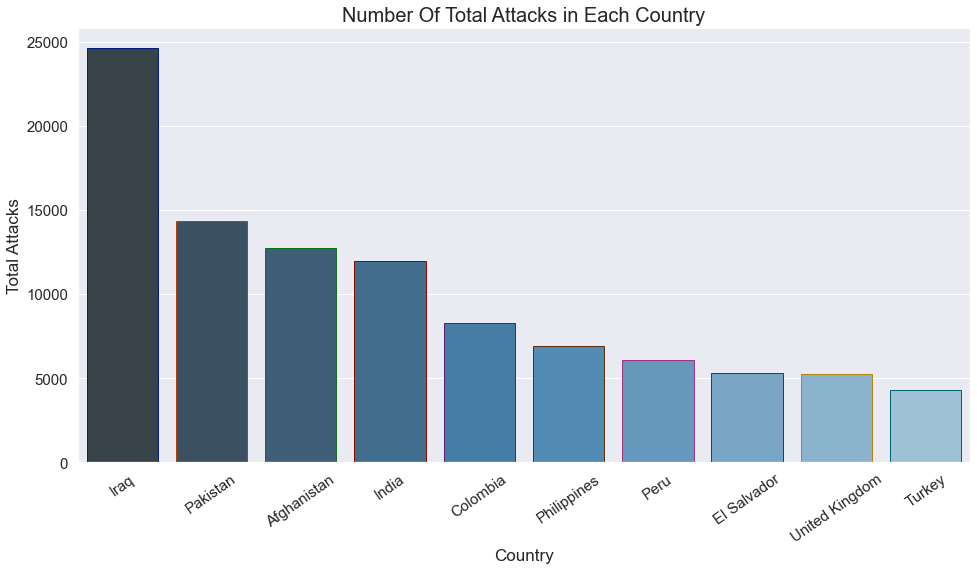

In [17]:
# gom nhóm theo quốc gia và đếm số lượng cuộc tấn công (top 10)
country_attacks = df['country'].value_counts()[:10].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']

# vẽ biểu đồ cột thể hiện số người bị thương theo từng quốc gia(top 10)
ax = sns.barplot(x='Country', y='Total Attacks',  
                 data=country_attacks,
                 palette= 'Blues_d',
                 edgecolor=sns.color_palette('dark',25))

# Thiết lập 1 số thuộc tính biểu đồ
ax.set_xlabel('Country', fontsize=17)
ax.set_ylabel('Total Attacks', fontsize=17)

plt.xticks(rotation=35, 
           fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number Of Total Attacks in Each Country', fontsize=20)
plt.show()

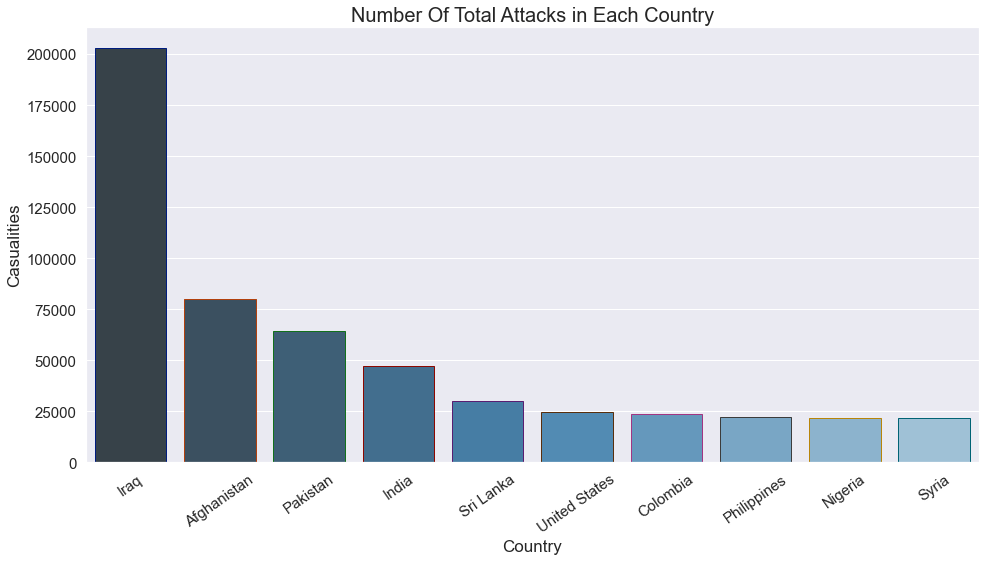

In [18]:
# Trước hết, ta thêm 1 cột dữ liệu là số người chết và bị thương (tổng của 2 cột 'killed' và 'wounded')
df['casualities'] = df.killed + df.wounded

#dữ liệu 10 quốc gia có số lượng người bị thương nhiều nhất
country_casualities = df.groupby('country')['casualities'].sum()  \
                      .to_frame().reset_index()  \
                      .sort_values('casualities', ascending=False)[:10]

# vẽ biểu đồ cột thể hiện số người bị thương theo từng quốc gia(top 10)
ax = sns.barplot(x='country', y='casualities', 
                 data=country_casualities, 
                 palette= 'Blues_d', 
                 edgecolor=sns.color_palette('dark',25))

# Thiết lập 1 số thuộc tính biểu đồ
ax.set_xlabel('Country', fontsize=17)
ax.set_ylabel('Casualities', fontsize=17)

plt.xticks(rotation=35, 
           fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number Of Total Attacks in Each Country', fontsize=20)

plt.show()

Biểu đồ đầu tiên cho ta thấy được số cuộc bạo loạn tại các quốc gia, điển hình là các quốc gia Irag, Afganistan, Pakistan, India luôn là tâm điểm trong các bản tin thời sự trong nước lẫn ngoài nước với số cuộc khủng bố rất nhiều.

Đối chiếu với 2 biểu đồ với nhau, ta có thể thấy số cuộc bạo loạn ở **Iraq** có ảnh hưởng đến số người chết và bị thương tại chính quốc gia này. Ngoài ra đối với các quốc gia khác thì sự tương quan này có xảy ra nhưng số lượng người bị ảnh hưởng thấp hơn rất nhiều so với **Iraq**.
 
Tuy nhiên con số phần nào nói lên rằng nội chiến tại Iraq xảy ra với quy mô lớn và con người vô tội bị lôi kéo vào cuộc chiến rất nhiều.

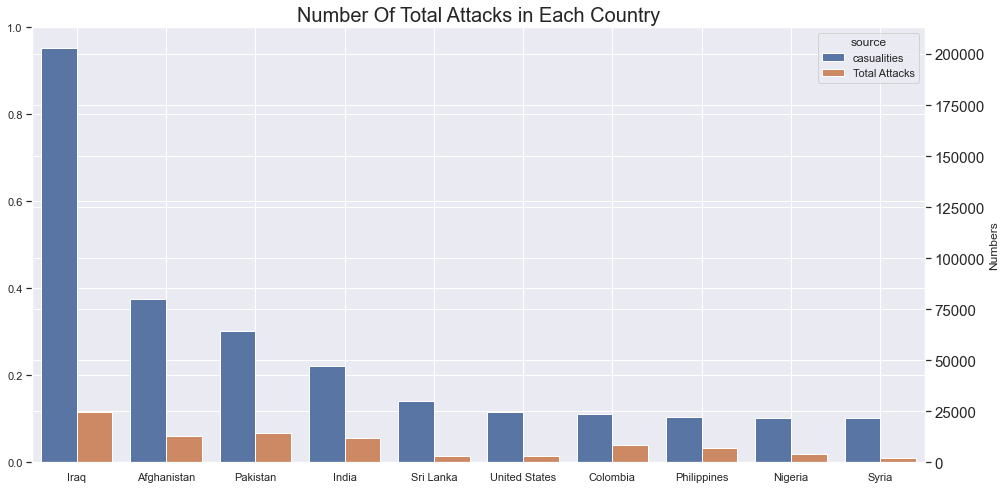

In [19]:
#dữ liệu 10 quốc gia có số lượng người chết và bị thương nhiều nhất
country_casualities = df.groupby('country')['casualities'].sum()  \
                      .to_frame().reset_index()  \
                      .sort_values('casualities', ascending=False)[:10]

#dữ liệu các quốc gia với số lượng cuộc khủng bố
country_attacks = df['country'].value_counts().reset_index()
country_attacks.columns = ['country', 'Total Attacks']

#join 2 dữ liệu lại theo country (left join)
tmp_df = country_casualities.set_index('country').join(country_attacks.set_index('country'), how='left')
tmp_df.reset_index(inplace=True)
tmp_df = tmp_df.sort_values(['casualities', 'Total Attacks'], ascending=False)

# melt dữ liệu để vẽ 2 cột trong cùng 1 biểu đồ cột
tmp_df_melt = pd.melt(tmp_df, 
                      id_vars='country',
                      value_vars=['casualities','Total Attacks'], 
                      var_name ='source',
                      value_name='Numbers')

plt.twinx()
# vẽ biểu đồ cột thể hiện số người bị ảnh hưởng và số cuộc khủng bố từng quốc gia(top 10)
ax = sns.barplot(x='country', y='Numbers', 
                 hue='source',
                 data=tmp_df_melt)

# Thiết lập 1 số thuộc tính biểu đồ
plt.xticks(rotation=35, 
           fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number Of Total Attacks in Each Country', fontsize=20)

plt.show()

Bên trên là biểu đồ thể hiện sự tương quan giữa 2 số liệu, và có thể thấy được rằng kết luận về **Iraq** trước đó là chính xác

Câu 2: Phân bố trên toàn thế giới thế nào?

Câu 3: Các cuộc khủng bố ở **Irag** phân bố như thế nào?

## Các phần tử gây nên khủng bố (nhóm, tổ chức)

Câu 1: Liệt kê các nhóm gây ra nhiều cuộc tấn công nhất

In [20]:
#dữ liệu các phần tử gây ra khủng bố
group_attacks = df['group'].value_counts().drop('Unknown').reset_index()
group_attacks.columns = ['group', 'Total Attacks']
group_attacks.head()

,group,Total Attacks
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288


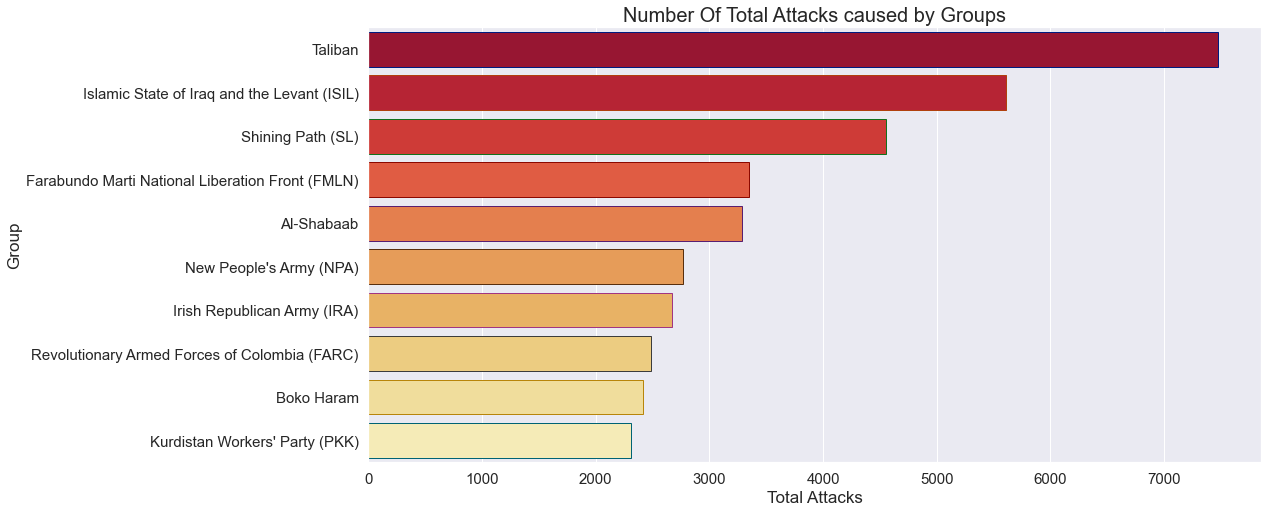

In [21]:
# vẽ biểu đồ top 10 các nhóm tấn công
ax = sns.barplot(x='Total Attacks', y='group', 
                 data=group_attacks[:10], 
                 palette= 'YlOrRd_r', 
                 edgecolor=sns.color_palette('dark',25))

# Thiết lập 1 số thuộc tính biểu đồ
ax.set_xlabel('Total Attacks', fontsize=17)
ax.set_ylabel('Group', fontsize=17)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number Of Total Attacks caused by Groups', fontsize=20)

plt.show()

Câu 2: Quy mô tấn công của các nhóm này như thế nào?

In [22]:
# Số lượng quốc gia mỗi nhóm tấn công
number_country_per_group = df.groupby('group')['country'].nunique().reset_index()
number_country_per_group.columns = ['group', 'Number of countries']
# Các quốc gia mỗi nhóm tấn công
countries_per_group = df.groupby('group')['country'].unique()

#Kết hợp dữ liệu lại
temp_total = pd.merge(group_attacks, number_country_per_group, how='left', on='group')
temp_total = pd.merge(temp_total, countries_per_group, how='left', on='group')
temp_total.head(10)

,group,Total Attacks,Number of countries,country
0,Taliban,7478,3,"[Afghanistan, Pakistan, Turkmenistan]"
1,Islamic State of Iraq and the Levant (ISIL),5613,25,"[Syria, Iraq, Turkey, Tunisia, Lebanon, Israel..."
2,Shining Path (SL),4555,6,"[Peru, Bolivia, Colombia, Argentina, Brazil, M..."
3,Farabundo Marti National Liberation Front (FMLN),3351,5,"[El Salvador, Guatemala, Honduras, Costa Rica,..."
4,Al-Shabaab,3288,6,"[Ethiopia, Somalia, Kenya, Uganda, Djibouti, T..."
5,New People's Army (NPA),2772,3,"[Philippines, Pakistan, India]"
6,Irish Republican Army (IRA),2671,13,"[United Kingdom, Ireland, United States, Zaire..."
7,Revolutionary Armed Forces of Colombia (FARC),2487,6,"[Colombia, Venezuela, Brazil, Ecuador, Peru, P..."
8,Boko Haram,2418,6,"[Nigeria, Cameroon, Niger, Chad, Burkina Faso,..."
9,Kurdistan Workers' Party (PKK),2310,16,"[Turkey, France, Switzerland, Austria, Norway,..."


Như vậy các tuy theo mỗi nhóm mà chúng có cách hoạt động khác nhau. Ví dụ như các nhóm Taliban, SL, FMLN, AI-Shabaab, ... thì chỉ tập trung 1 vài quốc gia. Các nhóm như ISIL, IRA, PKK lại tấn công rất nhiều quốc gia

Và trong 10 nhóm có số cuộc tấn công lớn nhất này, danh sách các quốc gia tấn công đều có những cái tên tiêu biểu như: Afghanistan, Pakistan, Syria, Irag, Israel, Nigeria, ... . Đây là các quốc gia thường được nhắc tới trong các bản tin quốc tế về vấn đề nhiều phần tử cực đoạn nội quốc gia.

Giả sử quy mô trung bình số lượng tấn công được tính theo công thức: (số lượng cuộc tấn công) / (số quốc gia)

Ta có được biểu đồ bên dưới

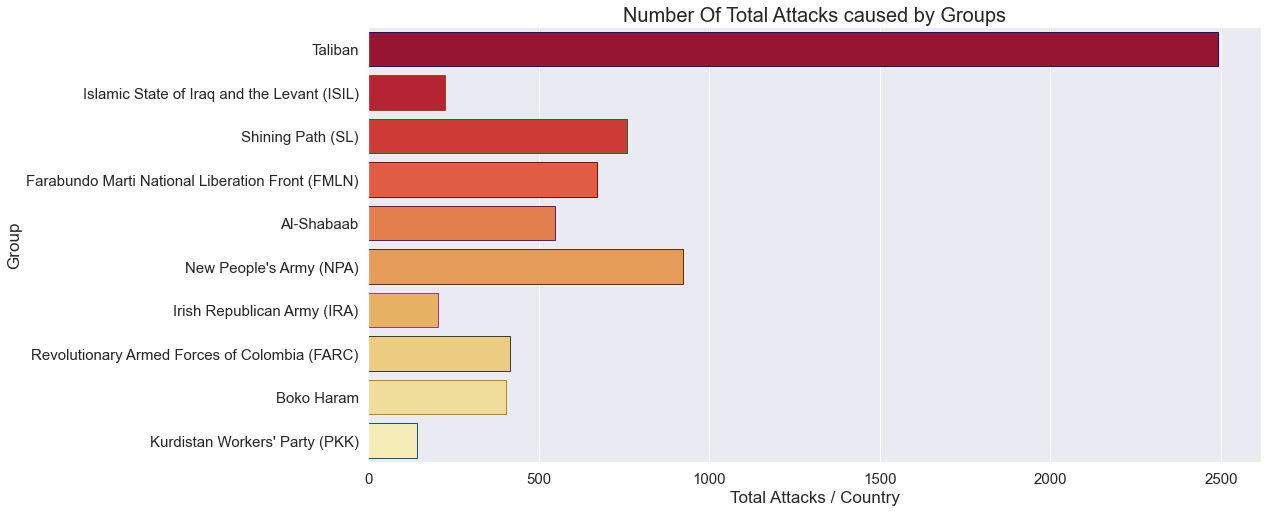

In [23]:
temp_total_top_10 = temp_total[:10]
# vẽ biểu đồ top 10 các nhóm có quy mô trung bình cuộc tấn công mỗi quốc gia
ax = sns.barplot(x=temp_total_top_10['Total Attacks']/temp_total_top_10['Number of countries'], y='group', 
                 data=temp_total_top_10, 
                 palette= 'YlOrRd_r', 
                 edgecolor=sns.color_palette('dark',25))

# Thiết lập 1 số thuộc tính biểu đồ
ax.set_xlabel('Total Attacks / Country', fontsize=17)
ax.set_ylabel('Group', fontsize=17)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number Of Total Attacks caused by Groups', fontsize=20)

plt.show()

Câu 3: Lấy ví dụ 2 quốc gia **Iraq**, **Afghanistan** về số cuộc khủng bố, thể hiện lên biểu đồ?

In [24]:
Iraq_df = df[df['country'] == 'Iraq'].reset_index()
Afghanistan_df = df[df['country'] == 'Afghanistan'].reset_index()

#dữ liệu các phần tử gây ra khủng bố ở Iraq
Iraq_group_attacks = Iraq_df['group'].value_counts().reset_index()
Iraq_group_attacks.columns = ['group', 'Total Attacks']

#dữ liệu các phần tử gây ra khủng bố ở Iraq
Afghanistan_group_attacks = Afghanistan_df['group'].value_counts().reset_index()
Afghanistan_group_attacks.columns = ['group', 'Total Attacks']

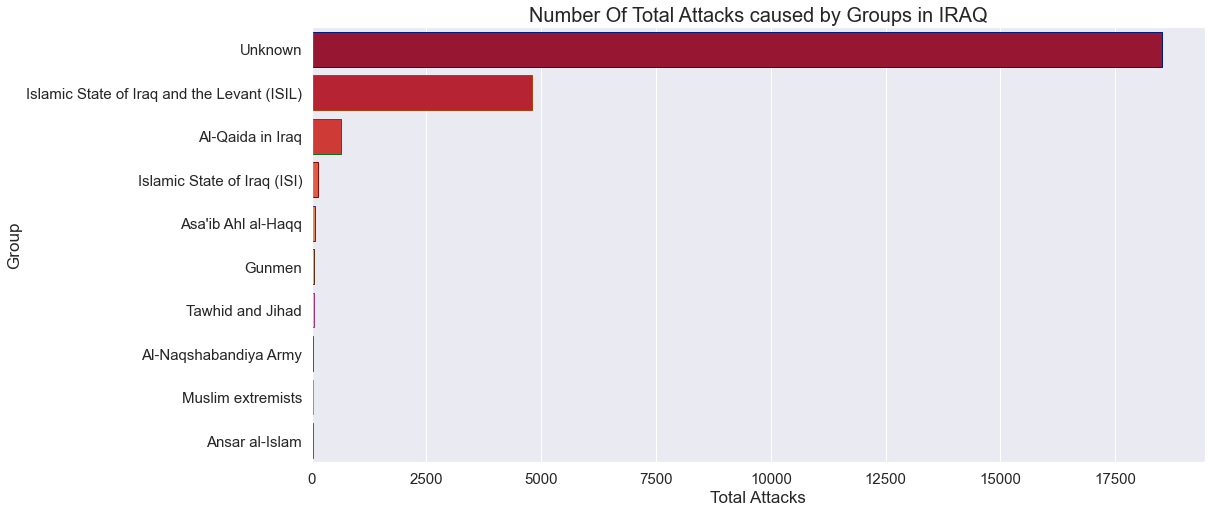

In [25]:
# vẽ biểu đồ top 10 các nhóm có số lần khủng bố ở Iraq
ax = sns.barplot(x='Total Attacks', y='group', 
                 data=Iraq_group_attacks[:10], 
                 palette= 'YlOrRd_r', 
                 edgecolor=sns.color_palette('dark',25))

# Thiết lập 1 số thuộc tính biểu đồ
ax.set_xlabel('Total Attacks', fontsize=17)
ax.set_ylabel('Group', fontsize=17)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number Of Total Attacks caused by Groups in IRAQ', fontsize=20)

plt.show()

Biểu đồ thể hiện số các cuộc khủng bố ở **Iraq** chủ yếu là quy mô tự phát, không có một tổ chức cụ thể nào đại diện hoặc không thể tìm ra tung tích của những kẻ gây lên những vụ này (có thể là tự sát)

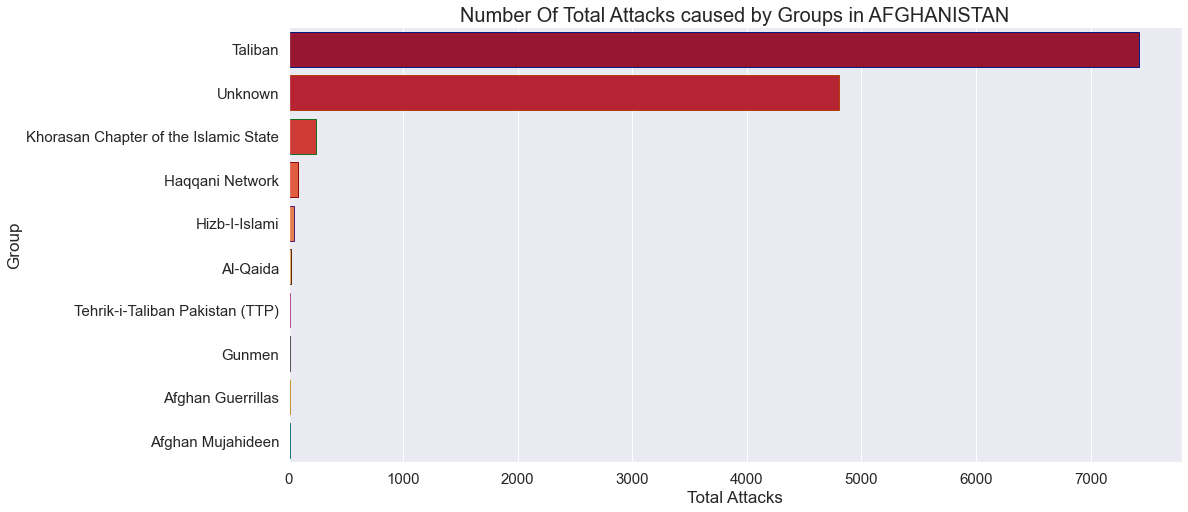

In [26]:
# vẽ biểu đồ top 10 các nhóm có số lần khủng bố ở Afghanistan
ax = sns.barplot(x='Total Attacks', y='group', 
                 data=Afghanistan_group_attacks[:10], 
                 palette= 'YlOrRd_r', 
                 edgecolor=sns.color_palette('dark',25))

# Thiết lập 1 số thuộc tính biểu đồ
ax.set_xlabel('Total Attacks', fontsize=17)
ax.set_ylabel('Group', fontsize=17)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number Of Total Attacks caused by Groups in AFGHANISTAN', fontsize=20)

plt.show()

Biểu đồ thể hiện số các cuộc khủng bố ở **Afghanistan** và thấy rõ được băng nhóm **Taliban** thống trị ở quốc gia này. Ngoài ra cũng có một số lượng lớn các phần tử không thể xác định danh tính gây ra nhiều cuộc tấn công


## Hình thức tấn công

Câu 1: Các hình thức tấn công chủ yếu bao gồm?

In [27]:
#dữ liệu các hình thức khủng bố
attack_type = df['attack_type'].value_counts().reset_index()
attack_type.columns = ['attack_type', 'total_attack']
attack_type

,attack_type,total_attack
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


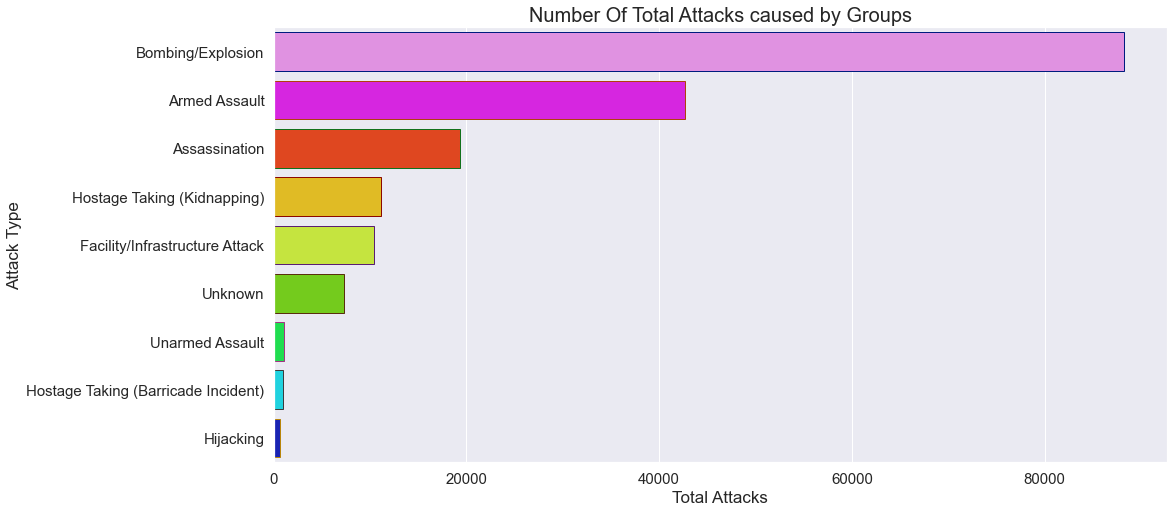

In [28]:
# vẽ biểu đồ top 10 các nhóm tấn công
ax = sns.barplot(x='total_attack', y='attack_type', 
                 data=attack_type, 
                 palette= 'gist_ncar_r', 
                 edgecolor=sns.color_palette('dark',25))

# Thiết lập 1 số thuộc tính biểu đồ
ax.set_xlabel('Total Attacks', fontsize=17)
ax.set_ylabel('Attack Type', fontsize=17)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Number Of Total Attacks caused by Groups', fontsize=20)

plt.show()

Qua biểu đồ, ta có thể thấy được vài điều:
- Các cuộc tấn công phần lớn sử dụng bom, thuốc nổ và tấn công có vũ trang. Có thể là cuộc chiến diễn ra giữa các băng đảng với nhau hoặc với những nhà chức trách cầm quyền.
- Thể loại tấn công còn có cả ám sát, bắt cóc và tấn công một cơ sở hạ tầng nào đó. Đây có thể là cuộc tấn công nhắm đến một quan chức cấp cao, ép buộc họ phải làm một điều gì đó hay là mâu thuẫn luật lệ.
- Không tặc là hình thức ít được áp dụng nhất. Có lẽ bởi vì các cuộc nội chiến chủ yếu xảy ra ở các quốc gia kém phát triển về kinh tế lẫn văn hóa, nhiều xung đột, và các phần tử tham gia gây nên cuộc chiến là các người dân nghèo, ít học. Nên đây có thể là hình thức đắt đỏ với họ.


Tuy nhiên, còn một thông tin liên quan nữa để có thể phân tích thêm, đó là liệu trong các cuộc khủng bố này, người gây ra có tự sát hay không? Đây là thông tin quan trọng có thể xác định được quy mô của cuộc tấn công cũng như danh tính của băng đảng.

In [29]:
#lấy ra số cuộc tấn công có tự sát theo hình thức tấn công
suicide_total = df.groupby(['attack_type'])['suicide'].sum()
suicide_total.columns = ['attack_type', 'total_suicide']

#lấy ra số người bị thương theo hình thức tấn công
casualities_total = df.groupby(['attack_type'])['casualities'].sum()


#Lấy ra nhóm có sử dụng hình thức tấn công đó nhiều nhất.
groups_per_attack_type = df.groupby(['attack_type', 'group'])['group'].agg(['count']).reset_index()
idx = groups_per_attack_type.groupby(['attack_type'])['count'].transform(max) == groups_per_attack_type['count']
groups_per_attack_type = groups_per_attack_type[idx]
groups_per_attack_type.columns = ['attack_type', 'max_group', 'max_count']
print(groups_per_attack_type)


# kết hợp dữ liệu lại
temp_attack_total = pd.merge(attack_type, suicide_total, how='left', on='attack_type')
temp_attack_total = pd.merge(temp_attack_total, casualities_total, how='left', on='attack_type')
temp_attack_total = pd.merge(temp_attack_total, groups_per_attack_type, how='left', on='attack_type')

temp_attack_total

                              attack_type max_group  max_count
1291                        Armed Assault   Unknown      16620
2160                        Assassination   Unknown       9330
3993                    Bombing/Explosion   Unknown      46968
4841       Facility/Infrastructure Attack   Unknown       4043
5047                            Hijacking   Unknown        265
5281  Hostage Taking (Barricade Incident)   Unknown        162
6047          Hostage Taking (Kidnapping)   Unknown       3457
6258                      Unarmed Assault   Unknown        409
6833                              Unknown   Unknown       1528


,attack_type,total_attack,suicide,casualities,max_group,max_count
0,Bombing/Explosion,88255,6214,514233.0,Unknown,46968
1,Armed Assault,42669,49,212386.0,Unknown,16620
2,Assassination,19312,262,37209.0,Unknown,9330
3,Hostage Taking (Kidnapping),11158,38,20267.0,Unknown,3457
4,Facility/Infrastructure Attack,10356,1,6293.0,Unknown,4043
5,Unknown,7276,2,39606.0,Unknown,1528
6,Unarmed Assault,1015,2,14791.0,Unknown,409
7,Hostage Taking (Barricade Incident),991,54,7465.0,Unknown,162
8,Hijacking,659,11,20642.0,Unknown,265


Có vẻ các cuộc tấn công xử dụng bom và thuốc nổ có số lượng kẻ tự sát rất nhiều, điều này cũng dễ hiểu bởi tính chất cực đoan của các tổ chức thuộc các quốc gia này.

Toàn bộ các hình thức tấn công đều bị một cá nhân hay tổ chức nào đó chưa xác định được danh tính sử dụng nhiều nhất. Và đặc biệt là đối với bom và thuốc nổ thì con số lên tới hơn 1 nửa số cuộc tấn công là không thể xác định được danh tính. Điều này đã từng lên trên bản tin thời sự là các phần tử đánh bom liều chết đều là bị dụ dỗ vào con đường cực đoan

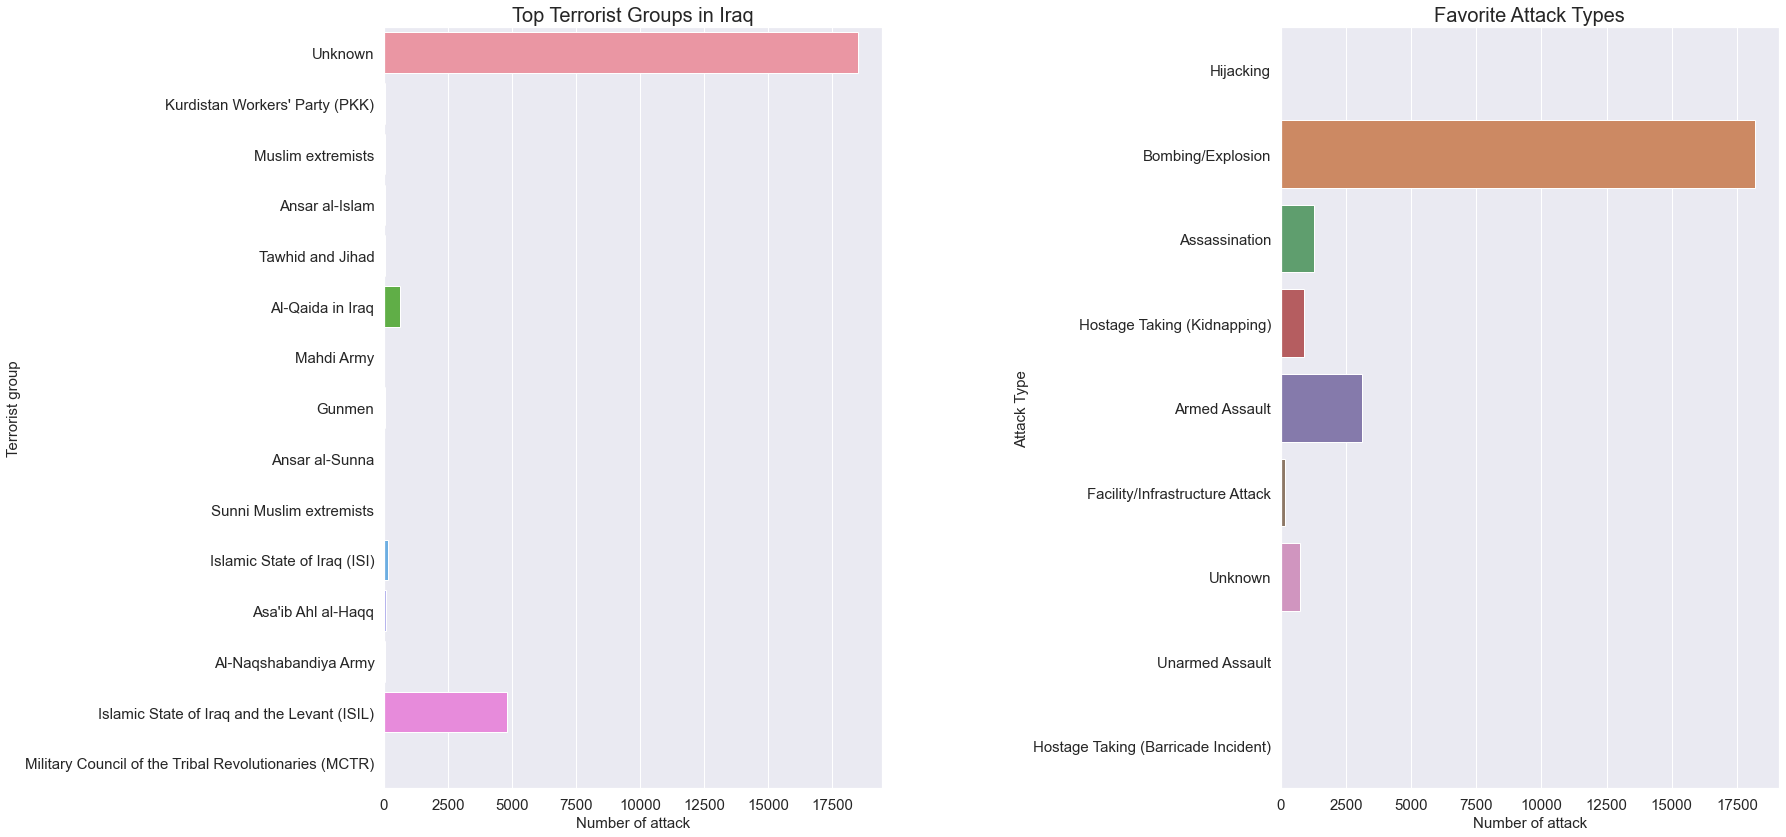

In [30]:
# Lấy dữ liệu về Iraq
Iraq_df = df[df.country=='Iraq'].reset_index()
Iraq_group = Iraq_df[Iraq_df['group'].isin(Iraq_df['group'].value_counts()[:15].index)]
# Vẽ đồ thị các hình 
f, ax=plt.subplots(1,2,figsize=(25,14))
sns.countplot(y='group',data=Iraq_group, ax=ax[0])

sns.countplot(y='attack_type',data=Iraq_group, ax=ax[1])

plt.subplots_adjust(wspace=0.8)

ax[0].set_title('Top Terrorist Groups in Iraq', fontsize=20)
ax[1].set_title('Favorite Attack Types', fontsize=20)

ax[0].set_title('Top Terrorist Groups in Iraq', fontsize=20)
ax[1].set_title('Favorite Attack Types', fontsize=20)

ax[0].set_xlabel('Number of attack', fontsize=15)
ax[0].set_ylabel('Terrorist group', fontsize=15)

ax[1].set_xlabel('Number of attack', fontsize=15)
ax[1].set_ylabel('Attack Type', fontsize=15)

ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

## Những năm gần đây